# PIK3CA: Effects of Hotspot Mutation on MTOR

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

### Import CPTAC

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

In [4]:
protein = 'MTOR'
gene = 'PIK3CA'

## Extract the data for hotspot mutations only 

In [5]:
#A list of mutations present in the hotspot according to our Hotspot3D output
hotspot_mutations = ['p.E545A', 'p.E545K', 'p.E545V', 'p.Q546P', 'p.Q546R', 'p.E542K']
mutated_hotspot = somatic.loc[(somatic['Location'].isin(hotspot_mutations)) & (somatic['Gene'] == gene)]
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']

In [6]:
p10_mutations = CPTAC.compare_mutations(proteomics, protein, gene)
#print(p10_mutations)
p10_mutations['Within_Hotspot'] = False
p10_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p10_mutations = p10_mutations.loc[p10_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)
print(len(p10_mutations.loc[(p10_mutations['Within_Hotspot'] == True)]))

19


## Hotspot mutation vs non-hotspot mutation

In [7]:
in_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
out_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == False]
ttest = scipy.stats.ttest_ind(in_hotspot[protein], out_hotspot[protein])
print(ttest)

Ttest_indResult(statistic=-1.6084072651267303, pvalue=0.11458881422507551)


## Hotspot mutation vs other mutations and wildtype

In [8]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] != True]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.336944950510979, pvalue=0.021477271861438874)


## All mutations vs wildtype

In [9]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-1.539219071353693, pvalue=0.12697356066680146)


## Hotspot mutation v wildtype

In [10]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.2281772678220286, pvalue=0.0291306543732104)


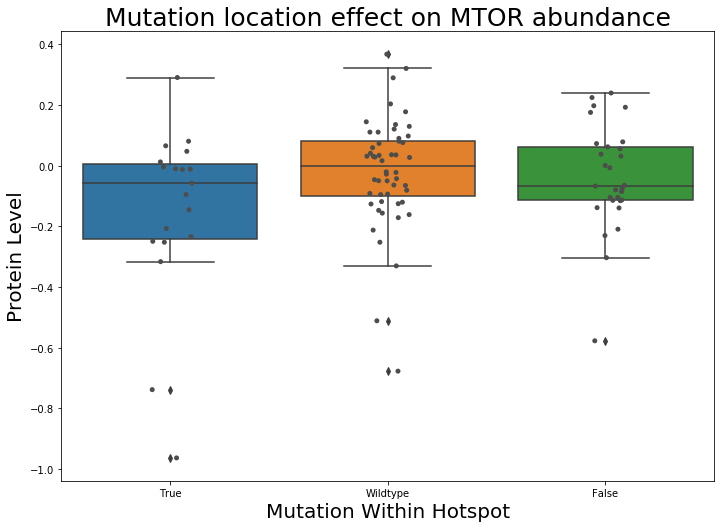

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, ax = ax)
boxplt = sns.stripplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on MTOR abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()

# Phosphoproteomic Abundance

In [12]:
phos_mutations = CPTAC.compare_mutations(phos, protein, gene)
phos_mutations['Within_Hotspot'] = False
phos_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True

phos_mutations.loc[phos_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
print(phos_mutations)


phos_mutations = phos_mutations.loc[phos_mutations['Patient_Type'] == 'Tumor']
#phos_mutations = phos_mutations.dropna(axis = 0)
#print(phos_mutations)
phos_sites = list(phos_mutations)
phos_sites = phos_sites[:(len(phos_sites) - 3)]

      LAMTOR1-S27  LAMTOR1-S42  LAMTOR1-S45  LAMTOR1-S56  LAMTOR1-S63  \
S001      -0.0810      -1.6800          NaN          NaN       0.5670   
S002       0.9420       0.2200          NaN          NaN       0.5800   
S003       0.6660          NaN          NaN          NaN       0.7540   
S004      -0.5400       0.1090          NaN          NaN      -0.2730   
S005      -0.1970       0.1320          NaN          NaN       0.4590   
S006      -0.1010       1.3300          NaN          NaN          NaN   
S007      -0.2390       0.5480          NaN          NaN       0.1300   
S008      -0.0527      -0.0794          NaN          NaN          NaN   
S009      -0.2160       0.2630          NaN          NaN       0.6640   
S010      -0.2940       0.8310          NaN          NaN          NaN   
S011       0.2560      -0.4240          NaN          NaN       0.4030   
S012       1.1600       0.2170          NaN          NaN          NaN   
S013       1.3000       0.9990          NaN        

## Hotspot mutation vs non-hotspot mutation

In [13]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == False]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for LAMTOR1-S27 Ttest_indResult(statistic=-1.3521523138386824, pvalue=0.18293732469580826)
Test for LAMTOR1-S42 Ttest_indResult(statistic=-1.3778018722044474, pvalue=0.17539311386429687)
Test for LAMTOR1-S45 Ttest_indResult(statistic=nan, pvalue=nan)
Test for LAMTOR1-S56 Ttest_indResult(statistic=nan, pvalue=nan)
Test for LAMTOR1-S63 Ttest_indResult(statistic=0.6363441123567741, pvalue=0.5295431083811419)
Test for LAMTOR1-S98 Ttest_indResult(statistic=-0.7962461247024352, pvalue=0.4840764742644996)
Test for LAMTOR1-T48 Ttest_indResult(statistic=2.1824280621505396, pvalue=0.06063252866843253)
Test for LAMTOR1-T61 Ttest_indResult(statistic=-0.9587155134116586, pvalue=0.3476724762980977)
Test for LAMTOR5-S108 Ttest_indResult(statistic=2.5090815607009853, pvalue=0.01661273486498749)
Test for LAMTOR5-S99 Ttest_indResult(statistic=1.5339896985398462, pvalue=0.14900307414383135)
Test for MTOR-S1261 Ttest_indResult(statistic=-1.5093786574103845, pvalue=0.1410136628974028)
Test for MTOR-S1

/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Hotspot mutation vs other mutations and wildtype

In [14]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] != True]
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for LAMTOR1-S27 Ttest_indResult(statistic=-0.2458686877244338, pvalue=0.8062980865678622)
Test for LAMTOR1-S42 Ttest_indResult(statistic=-2.3415552385985503, pvalue=0.02136231547233173)
Test for LAMTOR1-S45 Ttest_indResult(statistic=nan, pvalue=nan)
Test for LAMTOR1-S56 Ttest_indResult(statistic=nan, pvalue=nan)
Test for LAMTOR1-S63 Ttest_indResult(statistic=0.36214597296234297, pvalue=0.7183827164614707)
Test for LAMTOR1-S98 Ttest_indResult(statistic=-0.4924261216410105, pvalue=0.6399162853551368)
Test for LAMTOR1-T48 Ttest_indResult(statistic=0.7565986792581892, pvalue=0.4590794960197071)
Test for LAMTOR1-T61 Ttest_indResult(statistic=-1.2842333411425844, pvalue=0.2053547831800811)
Test for LAMTOR5-S108 Ttest_indResult(statistic=1.042669247586921, pvalue=0.30045082124980493)
Test for LAMTOR5-S99 Ttest_indResult(statistic=0.4878243024595489, pvalue=0.6288997918480204)
Test for MTOR-S1261 Ttest_indResult(statistic=-1.6596820929180836, pvalue=0.10194872398359216)
Test for MTOR-S182

## All mutations vs wildtype

In [15]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] != 'Wildtype']
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == 'Wildtype']
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for LAMTOR1-S27 Ttest_indResult(statistic=1.5849825952528163, pvalue=0.11619202055339348)
Test for LAMTOR1-S42 Ttest_indResult(statistic=-2.01098557621464, pvalue=0.047253803565703426)
Test for LAMTOR1-S45 Ttest_indResult(statistic=-0.30947590580738055, pvalue=0.7724108229281141)
Test for LAMTOR1-S56 Ttest_indResult(statistic=nan, pvalue=nan)
Test for LAMTOR1-S63 Ttest_indResult(statistic=-0.5963181823830618, pvalue=0.5529721635210612)
Test for LAMTOR1-S98 Ttest_indResult(statistic=0.12567561424324628, pvalue=0.9040940445402348)
Test for LAMTOR1-T48 Ttest_indResult(statistic=-1.0008607819775615, pvalue=0.33015984541340504)
Test for LAMTOR1-T61 Ttest_indResult(statistic=-0.7682364843348066, pvalue=0.44618965561970125)
Test for LAMTOR5-S108 Ttest_indResult(statistic=-0.8156212775945811, pvalue=0.41729953540085996)
Test for LAMTOR5-S99 Ttest_indResult(statistic=-0.24996204420494053, pvalue=0.8041662604577339)
Test for MTOR-S1261 Ttest_indResult(statistic=-0.5945624748407327, pvalue=0

## Hotspot mutation v wildtype

In [16]:
for site in phos_sites:
    mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = mutated[site].tolist()
    mutated_list = [x for x in mutated_list if str(x) != 'nan']
    #print(mutated_list)
    wt = phos_mutations.loc[phos_mutations['Within_Hotspot'] == 'Wildtype']
    wt_list = wt[site].tolist()
    wt_list = [x for x in wt_list if str(x) != 'nan']
    
    ttest = scipy.stats.ttest_ind(mutated_list, wt_list)
    print("Test for " + site, ttest)

Test for LAMTOR1-S27 Ttest_indResult(statistic=0.3651457162661673, pvalue=0.7161195316132374)
Test for LAMTOR1-S42 Ttest_indResult(statistic=-2.6330550622667594, pvalue=0.010562116469689145)
Test for LAMTOR1-S45 Ttest_indResult(statistic=nan, pvalue=nan)
Test for LAMTOR1-S56 Ttest_indResult(statistic=nan, pvalue=nan)
Test for LAMTOR1-S63 Ttest_indResult(statistic=0.10557368988462044, pvalue=0.9163605652002069)
Test for LAMTOR1-S98 Ttest_indResult(statistic=-0.19643255114417554, pvalue=0.8538480102696511)
Test for LAMTOR1-T48 Ttest_indResult(statistic=0.13005909313401043, pvalue=0.8985105964527422)
Test for LAMTOR1-T61 Ttest_indResult(statistic=-1.183743099444092, pvalue=0.24497184301029126)
Test for LAMTOR5-S108 Ttest_indResult(statistic=0.40654584642622127, pvalue=0.6859786131842842)
Test for LAMTOR5-S99 Ttest_indResult(statistic=0.2861853406208294, pvalue=0.7772980816740629)
Test for MTOR-S1261 Ttest_indResult(statistic=-1.3247235549852332, pvalue=0.19180650984311154)
Test for MTOR-S